# 1次変調

## QAM

`x_0, y_0`を変えて実行すると，1次変調された波に変わります。試してみましょう。

Amplitude:  2.8284271247461903
Angle:  45.0


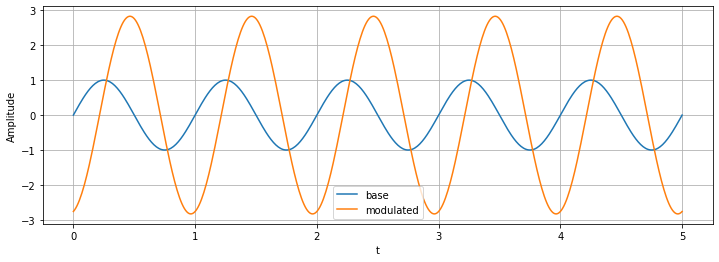

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 5, 500)

T = 1

# 平面上の点の位置
x_0 = 2
y_0 = 2

a = np.sqrt(x_0*x_0 + y_0*y_0)
theta = np.arctan(y_0/x_0)

print("Amplitude: ",a)
print("Angle: ", theta*(180/np.pi))

y_base = np.sin((2*np.pi/T)*x)
y = a*np.sin( (2*np.pi/T)*(x + theta))

plt.figure(figsize=[12,4])

plt.plot(x,y_base, label='base')
plt.plot(x,y, label='modulated')

plt.grid()
plt.legend()
plt.xlabel('t')
plt.ylabel('Amplitude')

plt.show()

# 2次変調

## フーリエ展開の例


$$ \frac{4}{\pi}\sum_{n=1}^\infty \frac{\sin((2n-1)x)}{2n -1} $$
$$ \frac{4}{\pi}\sin(x) $$
$$ \frac{4}{\pi}\left( \sin(x) + \frac{\sin(3x)}{3} + \frac{\sin(5x)}{5} \right) $$
$$ \frac{4}{\pi}\left( \sin(x) + \frac{\sin(3x)}{3} + \frac{\sin(5x)}{5}+ \frac{\sin(7x)}{7} + \frac{\sin(9x)}{9} \right) $$
$$ \frac{4}{\pi}\left( \sin(x) + \frac{\sin(3x)}{3} + \frac{\sin(5x)}{5}+ \frac{\sin(7x)}{7} + \frac{\sin(9x)}{9} + \frac{\sin(11x)}{11} + \frac{\sin(13x)}{13} \right) $$

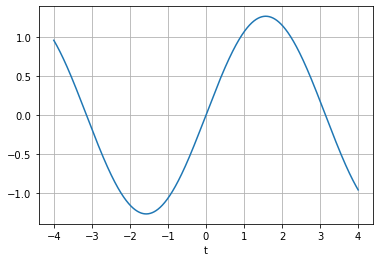

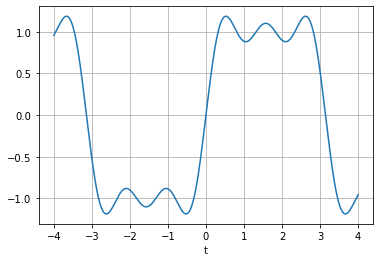

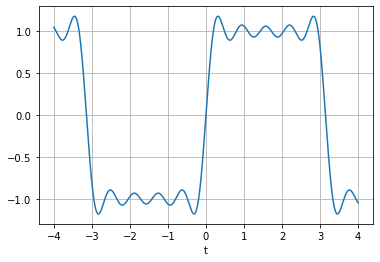

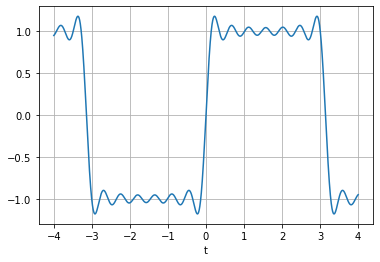

In [2]:
import matplotlib.pyplot as plt
import math 
import numpy as np

sp_step = 10000
f_step=1000
f_cutoff=30

T = 2
f_0 = 10

x = np.linspace(-2*T ,2*T, sp_step)

for l in range(4):
    ll = 2*l + 1
    yy = 0
    for nn in range(ll):
        n = nn + 1
        yy = yy + (4/np.pi)*np.sin((2*n - 1)*x)/(2*n -1)
    y = yy
    plt.grid()
    plt.xlabel('t')
    plt.plot(x,y) 
    plt.show()
#plt.show()

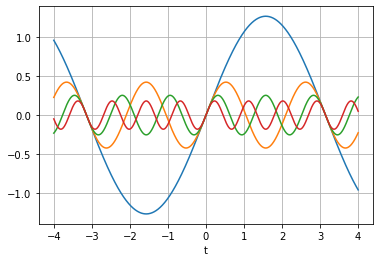

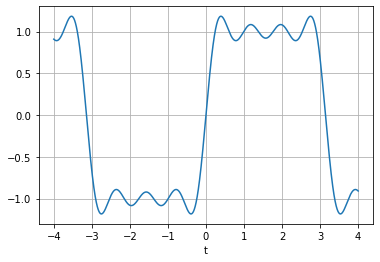

In [3]:
import matplotlib.pyplot as plt
import math 
import numpy as np

sp_step = 10000
f_step=1000
f_cutoff=30

T = 2
f_0 = 10

x = np.linspace(-2*T ,2*T, sp_step)

plt.grid()
plt.xlabel('t')
y=0
for nn in range(4):
    n = nn + 1
    yy = (4/np.pi)*np.sin((2*n - 1)*x)/(2*n -1)
    y = y + yy
    plt.plot(x,yy) 
plt.show()
plt.plot(x,y)
plt.grid()
plt.xlabel('t')
plt.show()


$$ \frac{4}{\pi}\left( \sin(x) + \frac{\sin(3x)}{3} + \frac{\sin(5x)}{5}+ \frac{\sin(7x)}{7} + \cdots\right) $$

$$ \frac{4}{\pi}\sum_{n=1}^\infty \frac{\sin((2n-1)x)}{2n -1} = \sum_{k} 周波数成分(k) \sin(kx), \quad k=1,3,5,\cdots$$

 $$周波数成分(k) = \frac{4}{\pi}\frac{1}{k}, \quad k = 1,3,5, \cdots$$

### 周波数成分

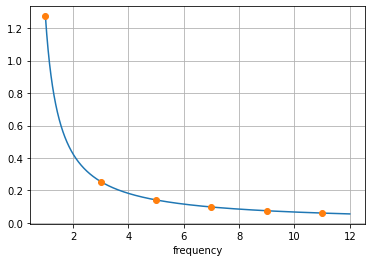

In [4]:
import matplotlib.pyplot as plt
import math 
import numpy as np


sp_step = 10000
f_step=1000
f_cutoff=30

T = 2
f_0 = 10

def freq(x):
    y = (4/np.pi)*(1/(2*x -1))
    return y

x = np.linspace(1 ,12, sp_step)

y = freq(x)

plt.plot(x,y)

x = [1,3,5,7,9,11]
y = [freq(1),freq(3),freq(5),freq(7),freq(9),freq(11)]
plt.plot(x,y,linestyle='',marker="o")

plt.grid()
plt.xlabel('frequency')
#plt.ylabel('value')
plt.show()

## OFDMのシンボル

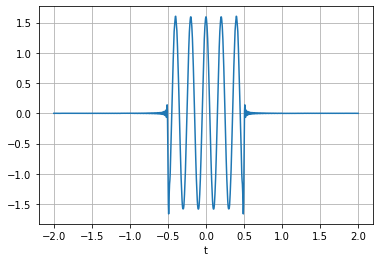

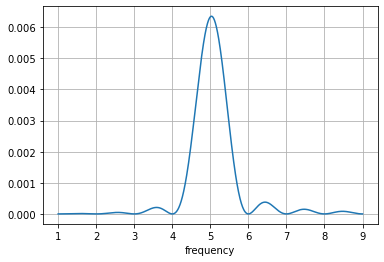

In [5]:
import matplotlib.pyplot as plt
import math 
import numpy as np

step=1000

# 幅T, 周波数f_0
T = 1
f_0 = 5

def sin_sum(x,start,end,n):
    t = 0
    for k in range(n):

        f = start + (start - end)*k/n
        w = (0.5/(2*np.pi))*(np.sinc( (f - f_0)*T )*T  + np.sinc( (f + f_0)*T )*T  )
        t = t + np.cos(2*np.pi*f*x)*w

    return t

# spacial
x = np.linspace(-2*T ,2*T, step)

y = sin_sum(x, 0, max(10*f_0, 10), step)
plt.plot(x,y) 
plt.xlabel('t')
plt.grid()
plt.show()

# frequency
#x = np.linspace(0, max(10*f_0, 10), step)
x = np.linspace(f_0-4, f_0+4, step)

y_0 = (0.5/(2*np.pi))*(np.sinc( (x - f_0)*T ) + np.sinc( (x + f_0)*T) ) 
plt.plot(x,y_0**2)
plt.xlabel('frequency')
plt.grid()
plt.show()

- シンボル周期T
- シンボル周波数f_0
- f_0 $\pm$ 1/Tで周波数成分0

T, f_0を変えて実行すると，シンボルと周波数が変わります。（あまり大きく変えると，表示が狂うかもしれません。）

試してみましょう

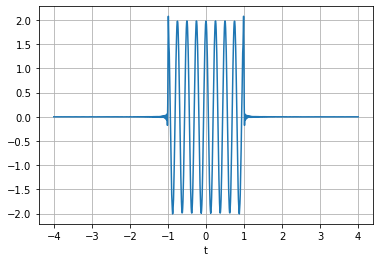

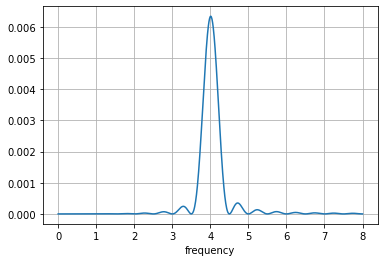

In [3]:
import matplotlib.pyplot as plt
import math 
import numpy as np

step=1000

# 幅T, 周波数f_0
T = 2
f_0 = 4

def sin_sum(x,start,end,n):
    t = 0
    for k in range(n):

        f = start + (start - end)*k/n
        w = (0.5/(2*np.pi))*(np.sinc( (f - f_0)*T )*T  + np.sinc( (f + f_0)*T )*T  )
        t = t + np.cos(2*np.pi*f*x)*w

    return t

# spacial
x = np.linspace(-2*T ,2*T, step)

y = sin_sum(x, 0, max(10*f_0, 10), step)
plt.plot(x,y) 
plt.xlabel('t')
plt.grid()
plt.show()

# frequency
#x = np.linspace(0, max(10*f_0, 10), step)
x = np.linspace(f_0-4, f_0+4, step)

y_0 = (0.5/(2*np.pi))*(np.sinc( (x - f_0)*T ) + np.sinc( (x + f_0)*T) ) 
plt.plot(x,y_0**2)
plt.xlabel('frequency')
plt.grid()
plt.show()